**Thony Yan <br>
PID:3913880**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# Multilayer Perceptron (MLP)

To understand a multilayer perceptron, we must see how a regular perceptron function. A perceptron is a very simple unit for learning machine. It does this by taking an input and multiplying it by their associated weights. The weights signify how important the input is. Now when you have multiple perceptrons, it forms a multilayer perceptron.[1] 

![](images/Perceptron2.png)

A multilayer perceptron is a structure where many perceptrons are stacked to form different layers to solve relatively complex problems. A basic MLP typically has three types of layers, the input layer which are the features we want to predict, the output layer that are the results after passing though the MLP, and the hidden layer which are basically neural networks that sits between the input and output layer. Below is a simple MLP structure with two features, three neurons as the hidden layer, and three outputs in the output layer. Note: the bias in the layers store as a value of one that makes it possible for the activation function be able to adjust.

![alt text](images/MLP.png)

Now in this project I will implement the MLP structure in Python. After the creating of the, I will implement the training algorithm that occurs in an MLP. Which consists of the feed forward calculation, the backpropagation, and finally updating the weights so that the neural network learns from the features pass through the network.

## The Data

First we must create the data to train on. We will be making an array of signed binary 1s that when arrange into a 5 by 5 matrix will display an image of the 5 vowels of the English alphabet *a ,e, i, o, u*. After creating the vowels we will create 4 more images from the original vowels but each image will have 1 pixel change (the 1 will turn to a -1 and vice versa).

In this following example we will see how it is suppose to look:<br>

![](images/A_image.png)

In [2]:
p1 = np.array([-1,-1,1,-1,-1,-1,1,-1,1,-1,1,1,1,1,1,1,-1,-1,-1,1])
p6 = np.array([1,1,1,1,1,1,-1,-1,-1,-1,1,1,1,-1,-1,1,1,1,1,1])
p11 = np.array([-1,1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1])
p16 = np.array([1,1,1,1,1,1,-1,-1,-1,1,1,-1,-1,-1,1,1,1,1,1,1])
p21 = np.array([1,-1,-1,-1,1,1,-1,-1,-1,1,1,-1,-1,-1,1,1,1,1,1,1])

In [3]:
p1 = p1.reshape(4,5)
p6 = p6.reshape(4,5)
p11 = p11.reshape(4,5)
p16 = p16.reshape(4,5)
p21 = p21.reshape(4,5)

In [4]:
p1.shape

(4, 5)

In [5]:
base = [p1,p6,p11,p16,p21]

In [6]:
def show(figs): # This function is use to show image
    img=plt.figure(figsize=(10, 10))
    for i in range(len(figs)):
        img.add_subplot(5, 5, i+1)
        plt.imshow(figs[i]-1, cmap='Greys')

**In the following snippet of code we can see all 5 vowels display.**

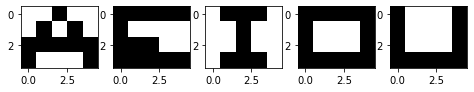

In [7]:
img=plt.figure(figsize=(8, 8))
for i in range(1,6):
    img.add_subplot(5, 5, i)
    plt.imshow(base[i-1]-1, cmap='Greys')

**Here we are getting the x and y coordinates to invert the pixel. Example we will get the original vowel A matrix and invert the pixel located at (2,1) to create a variation of A. Then we will repeat this process for (3,2) and so on.**

In [8]:
a_mod = np.array([[2,1],[3,2],[3,4],[4,4]])
e_mod = np.array([[2,2],[4,2],[5,3],[4,3]])
i_mod = np.array([[1,1],[4,2],[1,4],[4,3]])
o_mod = np.array([[2,2],[4,2],[2,3],[4,3]])
u_mod = np.array([[2,1],[4,1],[2,3],[4,3]])

In [9]:
mod = [a_mod,e_mod,i_mod,o_mod,u_mod]

In [10]:
def modify(base, mod):
    lst = []
    lst.append(base)
    for i in range(len(mod)):
        tmp = copy.deepcopy(base)
        tmp[mod[i][1]-1,mod[i][0]-1] *= -1
        lst.append(tmp)

    return lst

In [11]:
a_test = modify(base[0], mod[0])
e_test = modify(base[1], mod[1])
i_test = modify(base[2], mod[2])
o_test = modify(base[3], mod[3])
u_test = modify(base[4], mod[4])

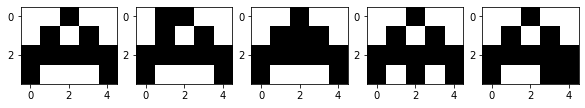

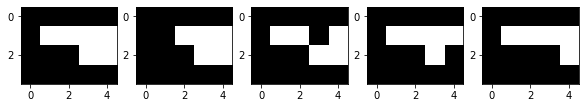

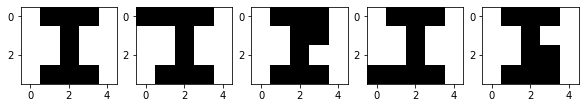

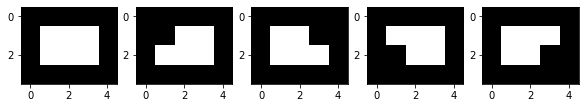

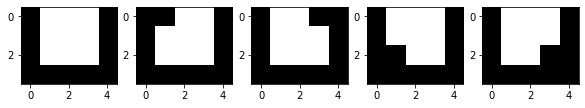

In [12]:
show(a_test)
show(e_test)
show(i_test)
show(o_test)
show(u_test)

**Above are the vowels and their 4 variations that we will use as the training set for our perceptron and adaline algorithm. Next we will be creating the test sets. In test set 1 we will still have the original vowels but now with a different 1 pixel variation.**

In [13]:
test_set = np.array([a_test,e_test,i_test,o_test,u_test])

In [14]:
tset_mod1 = np.array([[ [4,1],[5,3],[2,4],[1,2] ],  #tset1 a
                      [ [2,4],[5,2],[4,3],[1,3] ],  #tset1 e
                      [ [4,4],[2,4],[2,2],[3,4] ],  #tset1 i
                      [ [1,3],[3,2],[5,4],[3,3] ],  #tset1 o
                      [ [5,3],[3,4],[1,4],[5,4] ]]) #tset1 u

In [15]:
tset1_a = modify(base[0], tset_mod1[0])
tset1_e = modify(base[1], tset_mod1[1])
tset1_i = modify(base[2], tset_mod1[2])
tset1_o = modify(base[3], tset_mod1[3])
tset1_u = modify(base[4], tset_mod1[4])

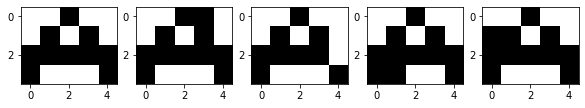

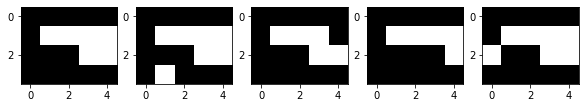

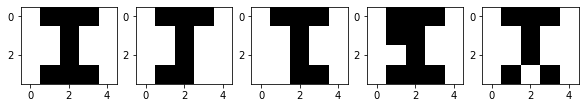

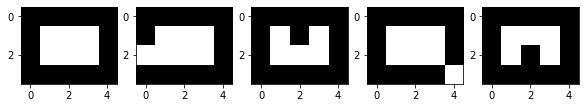

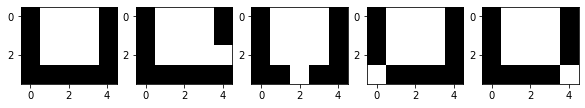

In [16]:
show(tset1_a)
show(tset1_e)
show(tset1_i)
show(tset1_o)
show(tset1_u)

In [17]:
tset1 = np.array([tset1_a,tset1_e,tset1_i,tset1_o,tset1_u])

**For test set 2 we will be grabbing the vowel variations from test set 1 and inverting 1 more pixel.**

In [18]:
tset_mod2 = np.array([[ [3,2],[1,3],[3,3],[2,1] ], #tset2 a
                      [ [3,2],[3,3],[5,4],[1,2] ], #tset2 e
                      [ [1,3],[2,2],[4,3],[1,4] ], #tset2 i
                      [ [4,3],[4,3],[5,1],[2,4] ], #tset2 o
                      [ [3,3],[2,2],[2,1],[1,3] ]])#tset2 u

In [19]:
def modify2(base,mod):
    lst = []
    lst.append(base[0])
    for i in range(1,5):
        tmp = copy.deepcopy(base[i])
        tmp[mod[i-1][1]-1,mod[i-1][0]-1] *= -1
        lst.append(tmp)
    return lst

In [20]:
tset2_a = modify2(tset1_a,tset_mod2[0])
tset2_e = modify2(tset1_e,tset_mod2[1])
tset2_i = modify2(tset1_i,tset_mod2[2])
tset2_o = modify2(tset1_o,tset_mod2[3])
tset2_u = modify2(tset1_u,tset_mod2[4])

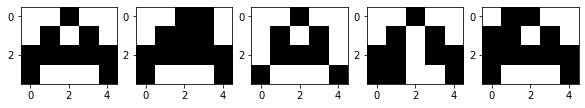

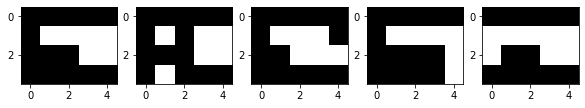

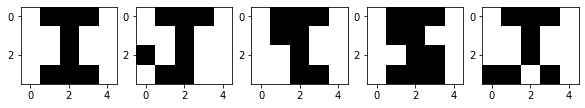

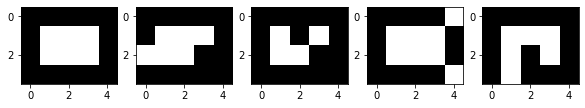

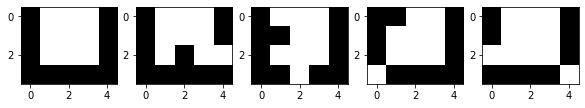

In [21]:
show(tset2_a)
show(tset2_e)
show(tset2_i)
show(tset2_o)
show(tset2_u)

In [22]:
tset2 = np.array([tset2_a,tset2_e,tset2_i,tset2_o,tset2_u])

**We will be using the same process to create test set 3 but using the variations of test set 2**

In [23]:
tset_mod3 = np.array([[ [5,2],[3,3],[1,3],[5,1] ], #tset3 a
                      [ [3,4],[1,4],[5,2],[1,3] ], #tset3 e
                      [ [1,1],[1,2],[2,4],[2,1] ], #tset3 i
                      [ [1,2],[4,2],[3,3],[1,4] ], #tset3 o
                      [ [3,2],[5,2],[5,4],[4,2] ]])#tset3 u

In [24]:
tset3_a = modify2(tset2_a,tset_mod3[0])
tset3_e = modify2(tset2_e,tset_mod3[1])
tset3_i = modify2(tset2_i,tset_mod3[2])
tset3_o = modify2(tset2_o,tset_mod3[3])
tset3_u = modify2(tset2_u,tset_mod3[4])

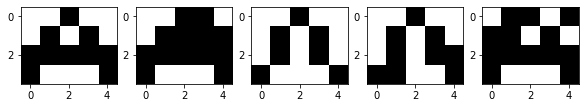

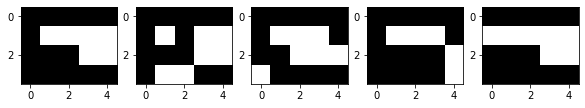

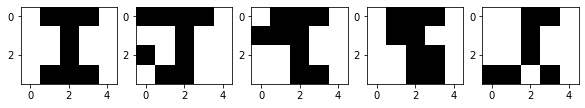

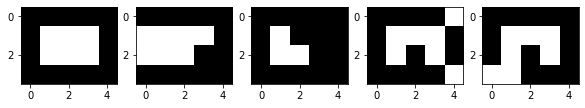

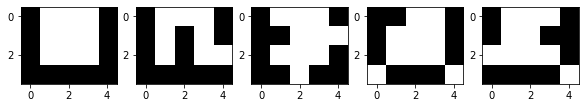

In [25]:
show(tset3_a)
show(tset3_e)
show(tset3_i)
show(tset3_o)
show(tset3_u)

In [26]:
tset3 = np.array([tset3_a,tset3_e,tset3_i,tset3_o,tset3_u])

## The Neural Network Training Cycle

### Feedforward
Feedforward or the forward propagation is the calculation and storage of intermediate variables from the input layer all the way to the output layer. we first get the sum of the weights multiply by the inputs and adding the bias, then we apply the activation function to get the activation value and use that as the output to pass it to the next consecutive layer.

![](images/feedforward.PNG)

### Back Propagation
Backpropagation is the method of calculating the gradient of the neural networks parameters. We do this by traversing the network in reverse order, meaning we are moving from the output layer to the input layer. By using partial derivatives of the parameters, $F^M(n^M)$, we can calculate the sensitivity to update the weights in the MLP.

![](images/BackPropagation.PNG)

### Weight update
After calculating all the sensitivity from the backpropagation we can begin updating the weights and bias from the network. We use alpha so we can slowly change the weights as dramatic changes to the weights will not produce desire results

![](images/WeightUpdate.PNG)

In [27]:
class Neural_Network:

    def __init__(self):
        self.weights = [] # weight matrices
        self.bias = [] # bias matrices
        self.activation = [] # activation functions
        self.z_val = [np.zeros(1)] # sum values of neurons. note: first value suppose to be inputs
        self.a_val = [np.zeros(1)] # values after activation functions are apply. note: first value suppose to be inputs
        self.sensitivity = [] # sensitivity or delta (derivatives)


    def add_layer(self, neurons: int, activation: str, input_shape=None):
        if input_shape is None:
            try:
                w = np.random.uniform(0,0.25,(self.weights[-1].shape[1],neurons))
                self.weights.append(w)
            except IndexError:
                w = np.random.uniform(0,0.25,(1,neurons))
                self.weights.append(w)

        else:
            input = np.prod(input_shape)
            w = np.random.uniform(0,0.25,(input,neurons))
            self.weights.append(w)

        self.bias.append(np.random.rand(neurons))
        self.activation.append(self.activation_f(activation))
        self.z_val.append(np.zeros(neurons))
        self.a_val.append(np.zeros(neurons))


    @staticmethod
    def sigmoid(x, derivative: bool=False):
        z = 1/(1+np.exp(-x))
        if derivative:
            z = z * (1-z)
        return z

    @staticmethod
    def tanh(x, derivative: bool=False):
        z =  (1-np.exp(-2*x)) / (1+np.exp(-2*x))
        if derivative:
            z = (1 + z) * (1 - z)
        return z

    @staticmethod
    def linear(x, derivative: bool=False):
        if derivative:
            return np.array(1)
        return x

    def activation_f(self, activation_name: str):

        activation = {
            'linear' : self.linear,
            'sigmoid' : self.sigmoid,
            'tanh' : self.tanh
        }

        act = str.lower(activation_name)

        if act in activation:
            return activation[act]
        else:
            print("activation function not in record")

    @staticmethod
    def mse(error):

        mse = np.sum(error ** 2)
        return mse

    @staticmethod
    def error(target, output):
        error = (target - output)
        return error
    
    @staticmethod
    def hardlim(output, tresh=0.35):
        
        output[output>tresh] = 1
        output[output<tresh] = -1
        return output
    
    @staticmethod
    def max_arg(output):
        
        index = output.argmax()
        output.fill(-1)
        output[index] = 1
        return output
        
    def feedforward(self, x):

        self.a_val[0] = x
        self.z_val[0] = x

        for layer in range(len(self.weights)):

            z = np.dot(self.a_val[layer], self.weights[layer]) + self.bias[layer]
            a = self.activation[layer](z)
            self.z_val[layer+1] = z
            self.a_val[layer+1] = a

    def back_propagate(self, error):
        error = -2 * error # -2 * (target-output)
        self.sensitivity = []
        for i in reversed(range(len(self.weights))):

            s = error * self.activation[i](self.z_val[i+1], derivative=True) # -2 * FMnM * (t-a)
            self.sensitivity.insert(0,s)
            error = np.dot(s, self.weights[i].T)

    def update_weights(self, alpha=0.1):
        for i in range(len(self.weights)):
            sensitivity = self.sensitivity[i]
            a = self.a_val[i]

            sensitivity = sensitivity.reshape(sensitivity.shape[0],-1)
            a = a.reshape(a.shape[0],-1)

            sa = np.dot(sensitivity,a.T)

            self.weights[i] = self.weights[i] - (alpha * sa.T)
            self.bias[i] = self.bias[i] - (alpha * self.sensitivity[i])

    def train(self, x, y, alpha=0.01):

        self.feedforward(x)
        error = self.error(y, self.a_val[-1])
        self.back_propagate(error)
        self.update_weights(alpha)
        return self.mse(error)

    def predict(self,x):
        self.a_val[0] = x
        self.z_val[0] = x
        for layer in range(len(self.weights)):

            z = np.dot(self.a_val[layer], self.weights[layer]) + self.bias[layer]
            a = self.activation[layer](z)
            self.z_val[layer+1] = z
            self.a_val[layer+1] = a
        
        print(self.max_arg(a))

In [28]:
y = np.array([1.,-1.,-1.,-1.,-1.])
inputs = np.array(a_test[0].flatten(), dtype=np.float)
inputs

array([-1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1.,  1.])

In [29]:
model = Neural_Network()

In [30]:

model.add_layer(10, 'sigmoid', input_shape=(4,5))
model.add_layer(5, 'tanh')

In [31]:
print(model.weights[0].shape)
print(model.weights[1].shape)
print(model.bias[0].shape)
print(model.bias[1].shape)

(20, 10)
(10, 5)
(10,)
(5,)


In [32]:
model.feedforward(inputs)

In [33]:
model.a_val

[array([-1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
         1.,  1.,  1., -1., -1., -1.,  1.]),
 array([0.62000885, 0.8084463 , 0.71093276, 0.57376458, 0.68597904,
        0.52703044, 0.68128565, 0.7773002 , 0.72662145, 0.53600461]),
 array([0.93174656, 0.845812  , 0.8922147 , 0.81101648, 0.87181584])]

In [34]:
model.z_val

[array([-1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
         1.,  1.,  1., -1., -1., -1.,  1.]),
 array([0.48958577, 1.43994608, 0.89991853, 0.29722734, 0.78138733,
        0.10822728, 0.75968643, 1.25000195, 0.97754818, 0.14426815]),
 array([1.67147601, 1.24125095, 1.43268099, 1.12999187, 1.34059817])]

In [35]:
error = model.error(y, model.a_val[-1])
error

array([ 0.06825344, -1.845812  , -1.8922147 , -1.81101648, -1.87181584])

In [36]:
s = model.activation[1](model.z_val[2], derivative=True) * error
st = s.reshape(s.shape[0],-1)
st

array([[ 0.0089991 ],
       [-0.52532191],
       [-0.38592271],
       [-0.6198245 ],
       [-0.44911813]])

In [37]:
a = model.a_val[1]
a = a.reshape(a.shape[0],-1)
a

array([[0.62000885],
       [0.8084463 ],
       [0.71093276],
       [0.57376458],
       [0.68597904],
       [0.52703044],
       [0.68128565],
       [0.7773002 ],
       [0.72662145],
       [0.53600461]])

In [38]:
Wnew = np.dot(st,a.T)

In [39]:
Wnew.T.shape

(10, 5)

In [40]:
model.weights[1].shape

(10, 5)

In [41]:
model.weights[1]

array([[0.22809962, 0.12449879, 0.00526227, 0.04125893, 0.09680355],
       [0.01901596, 0.23823608, 0.10551523, 0.02949544, 0.10175162],
       [0.18210991, 0.05271171, 0.0727251 , 0.16884822, 0.15969966],
       [0.06589254, 0.20263227, 0.18124648, 0.17723889, 0.13673728],
       [0.23167214, 0.17920724, 0.15195385, 0.08429956, 0.09230044],
       [0.00273775, 0.17667478, 0.05589328, 0.08120476, 0.06828368],
       [0.02476559, 0.03963769, 0.17419704, 0.19764916, 0.10028547],
       [0.22147369, 0.0761814 , 0.09630867, 0.11351608, 0.09596255],
       [0.11905052, 0.19680986, 0.16441865, 0.21741061, 0.07735016],
       [0.02439632, 0.12891445, 0.00523951, 0.08835639, 0.01489713]])

In [42]:
model.back_propagate(error)

In [43]:
model.sensitivity[1].shape

(5,)

In [44]:
model.bias[1].shape

(5,)

In [45]:
model.weights[0][14]

array([0.20170404, 0.14845394, 0.23022219, 0.22375229, 0.153603  ,
       0.20985659, 0.07793732, 0.0062973 , 0.09259791, 0.09444619])

In [46]:
model.update_weights()

In [47]:
print(model.weights[0].shape)
print(model.weights[1].shape)
print(model.bias[0].shape)
print(model.bias[1].shape)

(20, 10)
(10, 5)
(10,)
(5,)


In [48]:
a = model.a_val
t = np.dot(inputs, model.weights[0])
t

array([ 0.11308668,  0.3647209 ,  0.26376795, -0.15498182,  0.11629052,
       -0.41996385, -0.03908364,  0.50327888,  0.26481886, -0.29692796])

In [49]:
model = Neural_Network()
model.add_layer(10, 'sigmoid', input_shape=(4,5))
model.add_layer(5, 'tanh')

In [50]:
training_set = a_test, e_test, i_test, o_test, u_test
training_set

([array([[-1, -1,  1, -1, -1],
         [-1,  1, -1,  1, -1],
         [ 1,  1,  1,  1,  1],
         [ 1, -1, -1, -1,  1]]),
  array([[-1,  1,  1, -1, -1],
         [-1,  1, -1,  1, -1],
         [ 1,  1,  1,  1,  1],
         [ 1, -1, -1, -1,  1]]),
  array([[-1, -1,  1, -1, -1],
         [-1,  1,  1,  1, -1],
         [ 1,  1,  1,  1,  1],
         [ 1, -1, -1, -1,  1]]),
  array([[-1, -1,  1, -1, -1],
         [-1,  1, -1,  1, -1],
         [ 1,  1,  1,  1,  1],
         [ 1, -1,  1, -1,  1]]),
  array([[-1, -1,  1, -1, -1],
         [-1,  1, -1,  1, -1],
         [ 1,  1,  1,  1,  1],
         [ 1, -1, -1,  1,  1]])],
 [array([[ 1,  1,  1,  1,  1],
         [ 1, -1, -1, -1, -1],
         [ 1,  1,  1, -1, -1],
         [ 1,  1,  1,  1,  1]]),
  array([[ 1,  1,  1,  1,  1],
         [ 1,  1, -1, -1, -1],
         [ 1,  1,  1, -1, -1],
         [ 1,  1,  1,  1,  1]]),
  array([[ 1,  1,  1,  1,  1],
         [ 1, -1, -1,  1, -1],
         [ 1,  1,  1, -1, -1],
         [ 1,  1,  1,  1

In [51]:
y_set = np.array([[1.,-1,-1,-1,-1], [-1,1,-1,-1,-1],[-1,-1,1,-1,-1],[-1,-1,-1,1,-1],[-1,-1,-1,-1,1]])

In [52]:
epoch = 100
total_mse = []
random_w1 = []
random_w2 = []
random_w3 = []
bias1 = []
bias2 = []
random1 = np.random.randint(20)
random2 = np.random.randint(10)
random3 = np.random.randint(10)
random4 = np.random.randint(5)
bias_random1 = np.random.randint(10)
bias_random2 = np.random.randint(5)
for i in range(epoch):
    mse = 0
    random_w1.append(model.weights[0][random1][random2])
    random_w2.append(model.weights[1][random3][random4])
    bias1.append(model.bias[0][bias_random1])
    bias2.append(model.bias[1][bias_random2])

    for i in range(len(training_set)):
        set = training_set[i]
        target = y_set[i]
        for j in range(len(set)):
            #show(set)
            #print(target)
            mse += model.train(set[i].flatten(), target, 0.1)

    mse = (mse / 25.)
    total_mse.append(mse)
    

In [53]:
for i in range(len(training_set)):
    set = training_set[i]
    for j in range(len(set)):
        model.predict(set[i].flatten())

    print('')


[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]

[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]

[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]

[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]

[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]



Text(0.5, 1.0, 'mse')

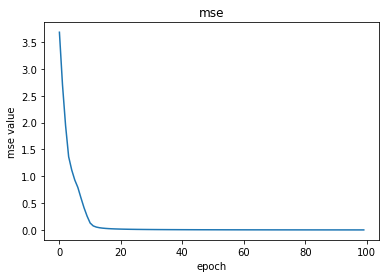

In [54]:
plt.plot(total_mse)
plt.xlabel('epoch')
plt.ylabel('mse value')
plt.title('mse')

In [55]:
total_mse

[3.6826571272075,
 2.7046079694290746,
 1.9475885937501494,
 1.3663561332760485,
 1.1181390757554346,
 0.9309809232399213,
 0.7925443766473285,
 0.5996958455235017,
 0.4161440130090264,
 0.25888539731569965,
 0.13022916168419876,
 0.07670947530164698,
 0.05513390491458483,
 0.04319677144131415,
 0.035512453765417604,
 0.03015807631405195,
 0.026212856861939127,
 0.023183247904263404,
 0.02078214242141847,
 0.018831390870133725,
 0.01721458927951161,
 0.015852420879524175,
 0.01468894069451163,
 0.013683533743110954,
 0.012805985371578274,
 0.01203334276200225,
 0.011347850783946416,
 0.0107355556510339,
 0.010185336794474984,
 0.00968822092336128,
 0.009236886584545882,
 0.008825300118615886,
 0.008448444006051319,
 0.008102111311968342,
 0.007782748166878767,
 0.0074873316580077644,
 0.007213274166143969,
 0.006958347689853935,
 0.006720623442853104,
 0.006498423241174307,
 0.006290280077112006,
 0.006094905914359948,
 0.005911165205624031,
 0.005738052979580371,
 0.005574676602414715

Text(0.5, 1.0, 'layer 1, weight (10,9)')

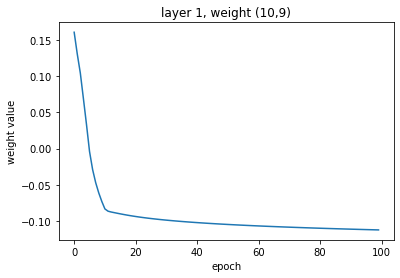

In [56]:
plt.plot(random_w1)
plt.xlabel('epoch')
plt.ylabel('weight value')
plt.title('layer 1, weight (' + str(random1) + ',' + str(random2) + ')')

Text(0.5, 1.0, 'layer 2, weight (2,3)')

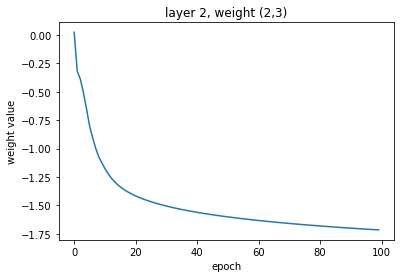

In [57]:
plt.plot(random_w2)
plt.xlabel('epoch')
plt.ylabel('weight value')
plt.title('layer 2, weight (' + str(random3) + ',' + str(random4) + ')')

Text(0.5, 1.0, 'layer 1, bias (8)')

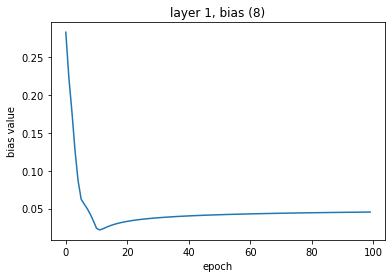

In [58]:
plt.plot(bias1)
plt.xlabel('epoch')
plt.ylabel('bias value')
plt.title('layer 1, bias (' + str(bias_random1) + ')')

Text(0.5, 1.0, 'layer 2, bias (4)')

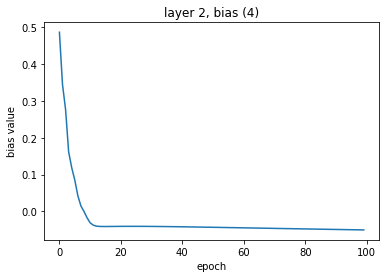

In [59]:
plt.plot(bias2)
plt.xlabel('epoch')
plt.ylabel('bias value')
plt.title('layer 2, bias (' + str(bias_random2) + ')')

In [60]:
def fit(model,epochs, alpha, dataset, targets, exit=0.01, input_l=20, hidden_l=10, output_l=5):
    total_mse = []
    random_w1 = []
    random_w2 = []
    random_w3 = []
    bias1 = []
    bias2 = []
    random1 = np.random.randint(input_l)
    random2 = np.random.randint(hidden_l)
    random3 = np.random.randint(hidden_l)
    random4 = np.random.randint(output_l)
    random5 = np.random.randint(input_l)
    random6 = np.random.randint(hidden_l)
    bias_random1 = np.random.randint(hidden_l)
    bias_random2 = np.random.randint(output_l)
    for epoch in range(epochs):
        mse = 0
        random_w1.append(model.weights[0][random1][random2])
        random_w2.append(model.weights[1][random3][random4])
        random_w3.append(model.weights[0][random5][random6])
        bias1.append(model.bias[0][bias_random1])
        bias2.append(model.bias[1][bias_random2])

        for i in range(len(dataset)):
            sets = dataset[i]
            target = targets[i]
            for j in range(len(sets)):
                mse += model.train(sets[i].flatten(), target, 0.1)

        mse = (mse / 25.)
        total_mse.append(mse)
        if mse < exit:
            break
    
    plt.plot(total_mse)
    plt.xlabel('epoch')
    plt.ylabel('mse value')
    plt.title('mse')
    plt.show()
    
    plt.plot(random_w1)
    plt.xlabel('epoch')
    plt.ylabel('weight value')
    plt.title('layer 1, weight (' + str(random1) + ',' + str(random2) + ')')
    plt.show()
    
    plt.plot(random_w2)
    plt.xlabel('epoch')
    plt.ylabel('weight value')
    plt.title('layer 2, weight (' + str(random3) + ',' + str(random4) + ')')
    plt.show()
    
    plt.plot(random_w3)
    plt.xlabel('epoch')
    plt.ylabel('weight value')
    plt.title('layer 1, weight (' + str(random5) + ',' + str(random6) + ')')
    plt.show()
    
    plt.plot(bias1)
    plt.xlabel('epoch')
    plt.ylabel('bias value')
    plt.title('layer 1, bias (' + str(bias_random1) + ')')
    plt.show()
    
    plt.plot(bias2)
    plt.xlabel('epoch')
    plt.ylabel('bias value')
    plt.title('layer 2, bias (' + str(bias_random2) + ')')
    plt.show()
    
    print('\n number of epochs to reach an mse of ' , epoch)

In [61]:
model1 = Neural_Network()
model1.add_layer(10, 'sigmoid', input_shape=(4,5))
model1.add_layer(5, 'tanh')

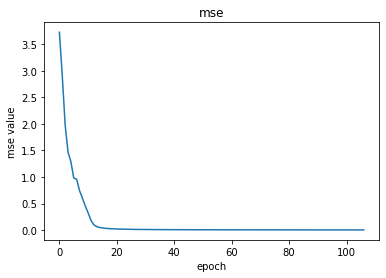

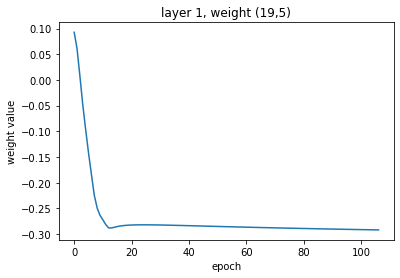

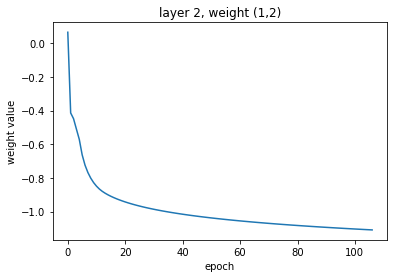

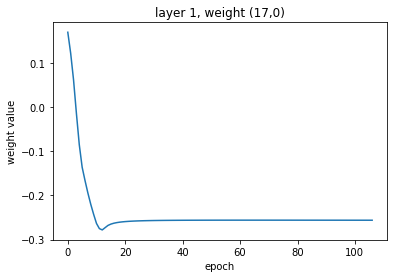

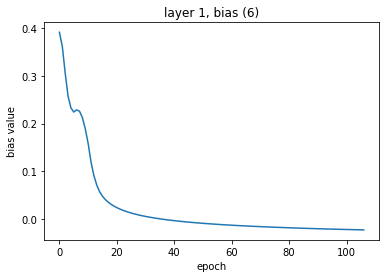

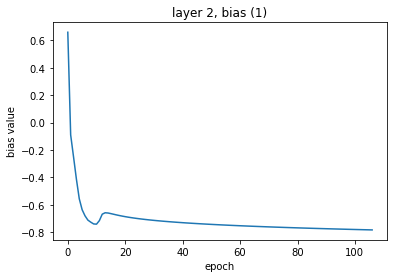


 number of epochs to reach an mse of  106


In [62]:
fit(model1,epochs=500, alpha=0.1, dataset=training_set, targets=y_set, exit=0.002)

In [63]:
model2 = Neural_Network()
model2.add_layer(10, 'sigmoid', input_shape=(4,5))
model2.add_layer(5, 'tanh')

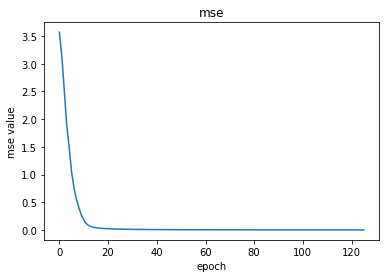

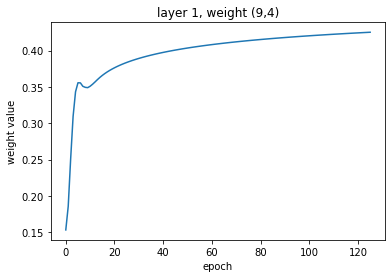

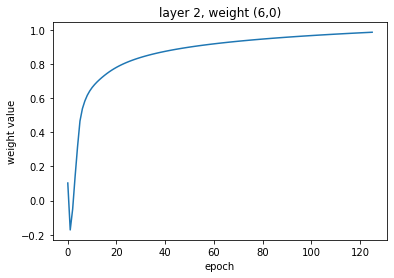

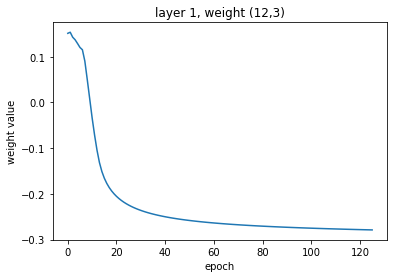

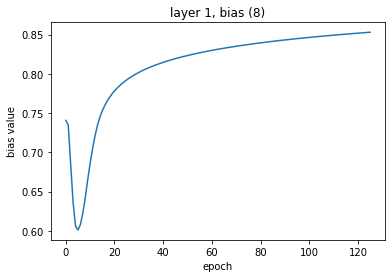

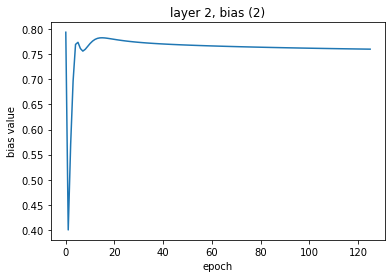


 number of epochs to reach an mse of  125


In [64]:
fit(model2,epochs=500, alpha=0.01, dataset=training_set, targets=y_set, exit=0.002)

In [65]:
model3 = Neural_Network()
model3.add_layer(10, 'sigmoid', input_shape=(4,5))
model3.add_layer(5, 'tanh')

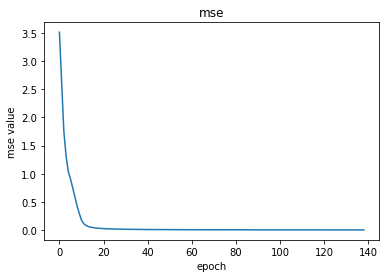

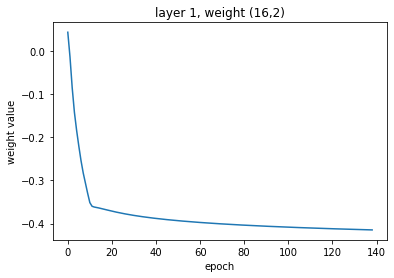

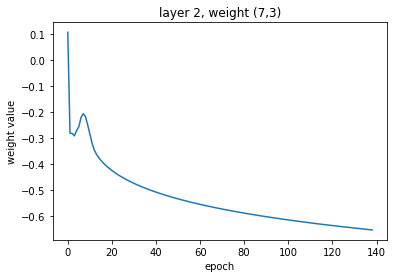

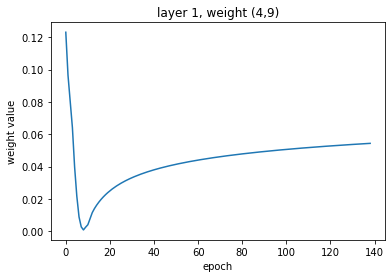

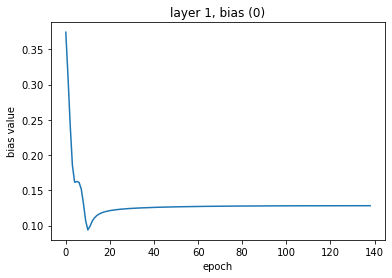

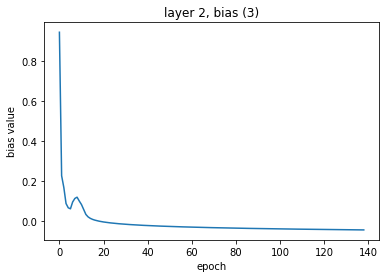


 number of epochs to reach an mse of  138


In [66]:
fit(model3,epochs=500, alpha=0.001, dataset=training_set, targets=y_set, exit=0.002)

In [67]:
for i in range(len(tset1)):
    sets = tset1[i]
    for j in range(len(sets)):
        model1.predict(sets[i].flatten())

    print('')

[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]

[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]

[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]

[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]

[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]



In [68]:
for i in range(len(tset2)):
    sets = tset2[i]
    for j in range(len(sets)):
        model1.predict(sets[i].flatten())

    print('')

[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]

[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]

[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]

[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]

[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]



In [69]:
for i in range(len(tset3)):
    sets = tset3[i]
    for j in range(len(sets)):
        model1.predict(sets[i].flatten())

    print('')

[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]

[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]

[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]

[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]

[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]



In [70]:
def destroy_weights(model, percent=0.2):
    for layers in range(len(model.weights)):
        n1 = model.weights[layers].shape[0]
        n2 = model.weights[layers].shape[1]
        twl = n1 * n2 # total weights in layer
        twl = int(twl* 0.2)
        destroyed = 0
        while(destroyed != twl):
            r1 = np.random.randint(low=0, high=n1)
            r2 = np.random.randint(low=0, high=n2)
        
            if model.weights[layers][r1][r2]!=0:
                model.weights[layers][r1][r2] = 0
                destroyed = destroyed + 1
            else:
                pass


In [71]:
copy_model1 = copy.deepcopy(model2)
copy_model2 = copy.deepcopy(model2)

In [72]:
copy_model1.weights[0].shape

(20, 10)

In [73]:
destroy_weights(copy_model1, percent=0.2)

In [74]:
print(f"There are {np.count_nonzero(copy_model1.weights[0]==0)} weights that are zero from input to hidden layer")
print(f"There are {np.count_nonzero(copy_model1.weights[1]==0)} weights that are zero from hidden layer to output")

There are 40 weights that are zero from input to hidden layer
There are 10 weights that are zero from hidden layer to output


In [75]:
for i in range(len(tset1)):
    sets = tset1[i]
    for j in range(len(sets)):
        copy_model1.predict(sets[i].flatten())

    print('')

[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]

[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]

[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]

[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]

[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]



In [76]:
for i in range(len(tset2)):
    sets = tset2[i]
    for j in range(len(sets)):
        copy_model1.predict(sets[i].flatten())

    print('')

[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]

[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]

[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]

[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]

[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]



In [77]:
for i in range(len(tset3)):
    sets = tset3[i]
    for j in range(len(sets)):
        copy_model1.predict(sets[i].flatten())

    print('')

[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]

[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]

[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]

[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]

[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]



In [78]:
destroy_weights(copy_model1, percent=0.2)

In [79]:
print(f"There are {np.count_nonzero(copy_model1.weights[0]==0)} weights that are zero from input to hidden layer")
print(f"There are {np.count_nonzero(copy_model1.weights[1]==0)} weights that are zero from hidden layer to output")

There are 80 weights that are zero from input to hidden layer
There are 20 weights that are zero from hidden layer to output


In [80]:
for i in range(len(tset1)):
    sets = tset1[i]
    for j in range(len(sets)):
        copy_model1.predict(sets[i].flatten())

    print('')

[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]

[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]

[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]

[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]

[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]



In [81]:
for i in range(len(tset2)):
    sets = tset2[i]
    for j in range(len(sets)):
        copy_model1.predict(sets[i].flatten())

    print('')

[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]

[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]

[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]

[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]

[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]



In [82]:
for i in range(len(tset3)):
    sets = tset3[i]
    for j in range(len(sets)):
        copy_model1.predict(sets[i].flatten())

    print('')

[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]

[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]

[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]

[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]

[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.]

